<a href="https://colab.research.google.com/github/christianadriano/DE_TimeSeriesAnalysis/blob/master/NonStationaryProcess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

def generate_non_stationary_series(N=10000):
    #Two time series X and Y, related by some constant relationship.
    sigmaX = 0.05
    sigmaEta = 0.1
    theta = 0.1
    mu = 100.

    X = [] #is a random walk
    Y = [] #is a function of the random walk and a spread epsilon
    epsilon = [mu] #is an Ornstein–Uhlenbeck process
    for t in range(N):
        if len(X) == 0:
            X.append(np.random.normal(10., sigmaX))
        else:
            X.append(X[-1] + np.random.normal(0., sigmaX))

        epsilon.append(epsilon[-1] + theta * (mu - epsilon[-1]) + 
                       np.random.normal(0., sigmaEta))

        Y.append(X[-1] + epsilon[-1])

    X = np.array(X)
    Y = np.array(Y)

    return X, Y


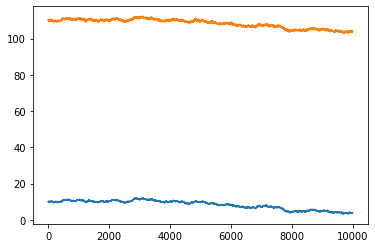

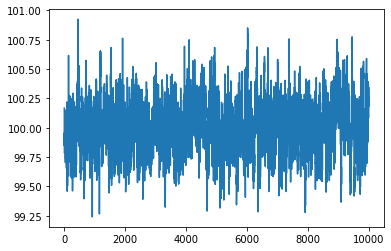

In [0]:
X, Y = generate_non_stationary_series()
plt.plot(X)
plt.plot(Y)

plt.show()
#
# # Visualize the spread
spread = Y - X
#
plt.plot(spread)
plt.show()

In [0]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)



In [0]:
#apply adf test on the series
adf_test(Y)

Results of Dickey-Fuller Test:
Test Statistic                   -0.424019
p-value                           0.906011
#Lags Used                       33.000000
Number of Observations Used    9966.000000
Critical Value (1%)              -3.431006
Critical Value (5%)              -2.861830
Critical Value (10%)             -2.566924
dtype: float64


In [0]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
      kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [0]:
kpss_test(Y)

Results of KPSS Test:
Test Statistic           22.525439
p-value                   0.010000
Lags Used                38.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)
